# Reading the Data

In [1]:
# reading the student performance data
sp_df = read.csv("Student_Performance.csv")
head(sp_df)

,Hours.Studied,Previous.Scores,Extracurricular.Activities,Sleep.Hours,Sample.Question.Papers.Practiced,Performance.Index
,<int>,<int>,<chr>,<int>,<int>,<int>
1,7,99,Yes,9,1,91
2,4,82,No,4,2,65
3,8,51,Yes,7,2,45
4,5,52,Yes,5,2,36
5,7,75,No,8,5,66
6,3,78,No,9,6,61


In [2]:
# checking the structure of the student performance data
str(sp_df)

'data.frame':	10000 obs. of  6 variables:
 $ Hours.Studied                   : int  7 4 8 5 7 3 7 8 5 4 ...
 $ Previous.Scores                 : int  99 82 51 52 75 78 73 45 77 89 ...
 $ Extracurricular.Activities      : chr  "Yes" "No" "Yes" "Yes" ...
 $ Sleep.Hours                     : int  9 4 7 5 8 9 5 4 8 4 ...
 $ Sample.Question.Papers.Practiced: int  1 2 2 2 5 6 6 6 2 0 ...
 $ Performance.Index               : int  91 65 45 36 66 61 63 42 61 69 ...


In [3]:
# checking number of rows and columns in the student performance data
cat("Number of rows in student performance data = ",dim(sp_df)[1], "\n")
cat("Number of columns = ",dim(sp_df)[2])

Number of rows in student performance data =  10000 
Number of columns =  6

# Data Cleaning

### 1. Renaming the columns

In [4]:
# Renaming the columns
colnames(sp_df) = c("hours_studied", "previous_scores", "extracurricular_activities", "sleep_hours", "sample_question_papers_practiced", "performance_index")
head(sp_df)

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
,<int>,<int>,<chr>,<int>,<int>,<int>
1,7,99,Yes,9,1,91
2,4,82,No,4,2,65
3,8,51,Yes,7,2,45
4,5,52,Yes,5,2,36
5,7,75,No,8,5,66
6,3,78,No,9,6,61


### 2. Dropping extracurricular_activities as it is a non-numeric feature

In [6]:
library(dplyr)
# dropping extracurricular_activities
sp_df = sp_df %>% select(-extracurricular_activities)
head(sp_df)

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
,<int>,<int>,<int>,<int>,<int>
1,7,99,9,1,91
2,4,82,4,2,65
3,8,51,7,2,45
4,5,52,5,2,36
5,7,75,8,5,66
6,3,78,9,6,61


### 3. Checking missing values

In [7]:
sum(is.na(sp_df))

[1] 0

#### There are no missing values.

### 4. Checking duplicate values

In [8]:
cat("Number of duplicates in student performance data = ", sum(duplicated(sp_df)))

Number of duplicates in student performance data =  234

In [9]:
# dropping duplicates
library(tidyverse)
sp_df = sp_df %>% distinct()
head(sp_df)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.1”
Warning message:
“package ‘tidyr’ was built under R version 4.3.1”
Warning message:
“package ‘stringr’ was built under R version 4.3.1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.5.0     ✔ stringr   1.5.1
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
,<int>,<int>,<int>,<int>,<int>
1,7,99,9,1,91
2,4,82,4,2,65
3,8,51,7,2,45
4,5,52,5,2,36
5,7,75,8,5,66
6,3,78,9,6,61


In [11]:
# verifying duplicates
cat("Number of duplicates in student performance data =", sum(duplicated(sp_df)))

Number of duplicates in student performance data = 0

### 5. Checking outliers

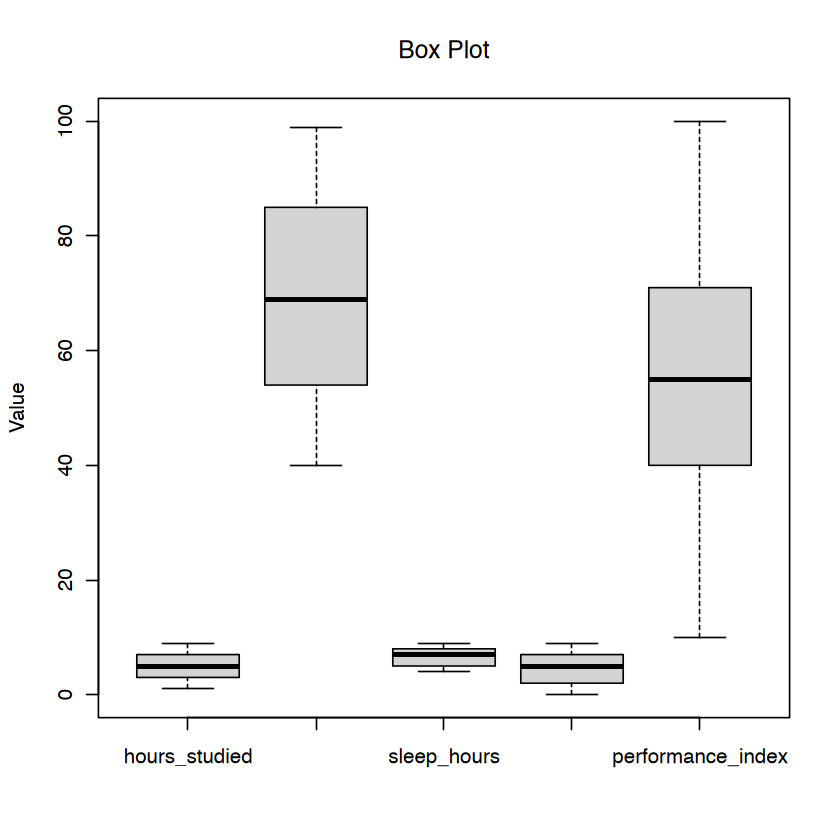

In [12]:
boxplot(sp_df, main = "Box Plot", ylab = "Value")

#### From the above boxplot, I could interpret that there are no outliers.

# 1. Hypothesis Testing

In [13]:
# calculating mean studied hours
mean_hours_studied = mean(sp_df$hours_studied)
cat("mean hours studied = ", mean_hours_studied)

# creating two study groups (less than or equal to mean and more than mean)
studiedless = sp_df[sp_df$hours_studied <= mean_hours_studied, ]
studiedmore = sp_df[sp_df$hours_studied > mean_hours_studied, ]
head(studiedless)
head(studiedmore)

mean hours studied =  4.991911

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
,<int>,<int>,<int>,<int>,<int>
2,4,82,4,2,65
6,3,78,9,6,61
10,4,89,4,0,69
13,3,47,9,2,27
16,2,72,4,3,43
19,2,54,4,9,30


,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
,<int>,<int>,<int>,<int>,<int>
1,7,99,9,1,91
3,8,51,7,2,45
4,5,52,5,2,36
5,7,75,8,5,66
7,7,73,5,6,63
8,8,45,4,6,42


In [14]:
dim(studiedless)
dim(studiedmore)

[1] 4345    5

[1] 5421    5

Since the sample size is large(>30), it resembles normal distribution. So, Z-Test needs to be done.

In [15]:
# library for z-test
install.packages("BSDA")
library(BSDA)


The downloaded binary packages are in
	/var/folders/gk/64vmdqys05vfzj3ywcq327z00000gn/T//Rtmpw4FXjB/downloaded_packages


Warning message:
“package ‘BSDA’ was built under R version 4.3.1”
Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:datasets’:

    Orange




In [16]:
# function for manual z-statistic calculation
zscore_two_sample <- function(sample1,sample2){
    m1 <- mean(sample1)
    m2 <- mean(sample2)
    
    var1 <- var(sample1)
    var2 <- var(sample2)
    
    n <- length(sample1)
    m <- length(sample2)
    (m1 - m2)/sqrt(var1/n +var2/m)
}

Upper tailed Two Sample z-test

Null Hypothesis ($H_0$): There is no difference in performance index for group of students who studied more and group of students who studied less.

Alternative Hypothesis ($H_A$): Performance index is more for group of studentes who studied more compared to group of students who studied less.

I am fixing the significance level $\alpha$ = 5% = 0.05. I will reject null hypothesis if P-Value is 0.05.

#### Manual Test

In [17]:
z_stat <- zscore_two_sample(studiedmore$performance_index, studiedless$performance_index)
cat("z statistic =", z_stat)

z statistic = 34.2519

In [19]:
p_value <- 1- pnorm(z_stat)
cat("P-Value =",p_value)

P-Value = 0

#### z.test from BSDA package

In [21]:
z_test = z.test(x = studiedmore$performance_index, y = studiedless$performance_index, alternative = 'greater', sigma.x = sd(studiedmore$performance_index), sigma.y = sd(studiedless$performance_index))
z_test


	Two-sample z-Test

data:  studiedmore$performance_index and studiedless$performance_index
z = 34.252, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 12.05845       NA
sample estimates:
mean of x mean of y 
 60.87456  48.20783 


#### From the above z-test, p-value is significantly less than the significance level $\alpha$ = 0.05. So, there is strong evidence to reject my null hypothesis in favour of alternative hypothesis and conclude that Performance index is more for group of students who studied more compared to group of students who studied less.

# 2. Hypothesis Testing with Randomization

In [25]:
# calculating number of students in studied more group and studied less group
n_studiedmore = dim(studiedmore)[1]
n_studiedless = dim(studiedless)[1]
cat("studied more group count =", n_studiedmore, '\n')
cat("studied less group count =", n_studiedless)

studied more group count = 5421 
studied less group count = 4345

In [26]:
# calculating number of students with good performance index in studied more group
studiedmore_goodpi = nrow(subset(studiedmore, performance_index >= 50))
cat("number of students with good performance index in studied more group =",studiedmore_goodpi)

number of students with good performance index in studied more group = 3700

In [27]:
# calculating number of students with good performance index in studied less group
studiedless_goodpi = nrow(subset(studiedless, performance_index >= 50))
cat("number of students with good performance index in studied less group =",studiedless_goodpi)

number of students with good performance index in studied less group = 2079

In [30]:
# calculating proportion of students with good performance index in studied more group
proportion_studiedmore_goodpi = studiedmore_goodpi/n_studiedmore
cat("proportion of students in studied more group with good performance index =", proportion_studiedmore_goodpi)

proportion of students in studied more group with good performance index = 0.6825309

In [31]:
# calculating proportion of students with good performance index in studied less group
proportion_studiedless_goodpi = studiedless_goodpi/n_studiedless
cat("proportion of students in studied less group with good performance index =", proportion_studiedless_goodpi)

proportion of students in studied less group with good performance index = 0.478481

In [32]:
# calculating observed difference in proportion of students with good performance index in studied more and studied less group
observed_diff_goodpi_rate = prop_studiedmore_goodpi - prop_studiedless_goodpi
cat("observed diffference in proportion of students with good performance index in studied more and less groups =", observed_diff_goodpi_rate)

observed diffference in proportion of students with good performance index in studied more and less groups = 0.2040499

Null Hypothesis ($H_0$): Good performance index is indepedent of Studied More and Studied Less groups. The observed difference in proportion of students with good performance index between Studied More and Studied Less is due to natural variability inherent in population.

Alternative Hypothesis ($H_A$): Good performance index is not indepedent of Studied More and Studied Less groups. The observed difference in proportion of students with good performance index between Studied More and Studied Less was not due to natural variability inherent in population. Studied More group students are more likely to have good performance index compared to Studied Less group students.

In [33]:
set.seed(1234)

# number of students with good performance index and non good performance index in both studied more and studied less groups
n_goodpi <- 5779
n_non_goodpi <- 3987

# creating 5779 goodpi cards and 3987 non-goodpi cards
goodpi_cards <- rep("goodpi", n_goodpi)
non_goodpi_cards <- rep("non-goodpi", n_non_goodpi)
cards <- c(goodpi_cards, non_goodpi_cards)

# creating an array to store 1000 simulated difference in good performance index rate
n_simulations <- 1000
simulated_diff_goodpi_rates <- numeric(n_simulations)

for (i in 1:n_simulations){
    # shuffling cards and making random draws
    shuffled_cards <- sample(cards)
    
    # Placed 5421 cards into studied More stack and 4345 cards into Studied Less stack.
    studiedmore_group <- sample(shuffled_cards, n_studiedmore)
    studiedless_group <- sample(shuffled_cards, n_studiedless)

    # calculating proportion of students with good performance index in studied more and studied less groups
    prop_studiedmore_goodpi = sum(studiedmore_group == "goodpi")/n_studiedmore
    prop_studiedless_goodpi = sum(studiedless_group == "goodpi")/n_studiedmore
    
    # calculating goodpi_rate for each simulation
    simulated_diff_goodpi_rate <-prop_studiedmore_goodpi - prop_studiedless_goodpi
    simulated_diff_goodpi_rates[i] <- simulated_diff_goodpi_rate
    
}

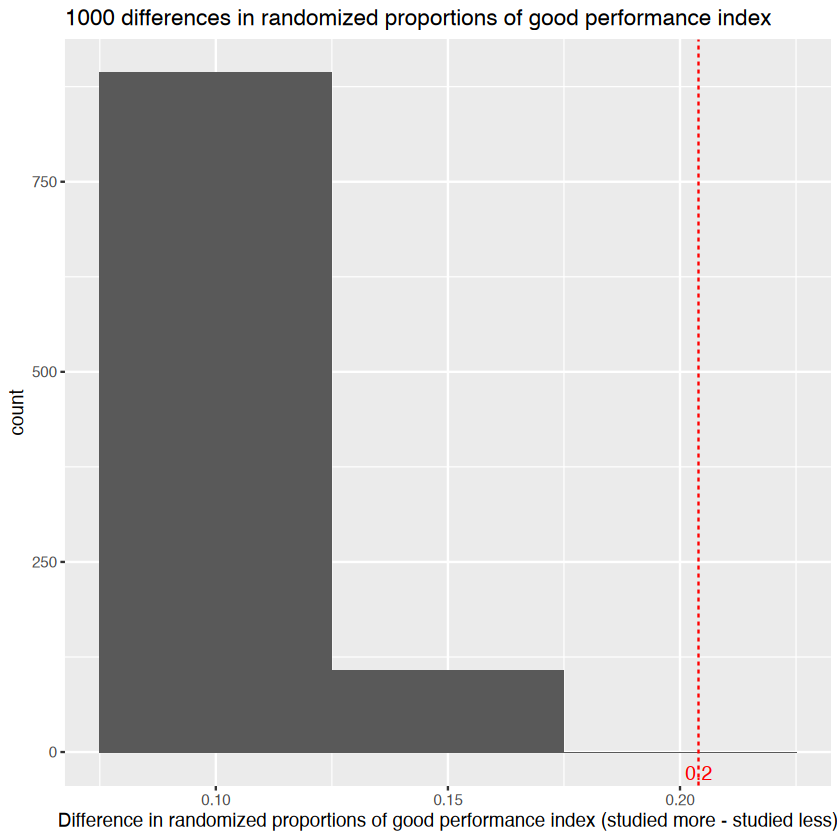

In [36]:
library(ggplot2)
# plotting 1000 differences in randomized proportions of good performance index in studied more and studied less groups
ggplot()+
geom_histogram(aes(x = simulated_diff_goodpi_rates), binwidth = 0.05) +
geom_vline(xintercept = observed_diff_goodpi_rate, color = "red", linetype = 'dashed') +
annotate("text", x = observed_diff_goodpi_rate, y = 0, label = round(observed_diff_goodpi_rate,2), color = "red", size = 4, vjust = 2) +
labs(x = "Difference in randomized proportions of good performance index (studied more - studied less)", y = "count", title = "1000 differences in randomized proportions of good performance index")

In [37]:
# calculating proportion of simulated difference in good performance index rate as extreme as observed difference in good performance index rate.
proportion_extreme <- sum(simulated_diff_goodpi_rates>= observed_diff_goodpi_rate) / n_simulations
proportion_extreme

[1] 0

0 simulations out of 1000 simulations have simulated difference in good performance index between studied more and studied less groups as extreme as observed difference in good performance index between studied more and studied less groups.

Fraction of simulations where the differences in proportions of good performance index rate are greater than or equal to observed/original difference in dgood performance index rate is 0 (0%), which is significantly less than the significance level $\alpha$ = 5% = 0.05. 

#### So, I have strong evidence to reject my null hypothesis in favour of alternative hypothesis. So, I can conclude that Good performance index is not indepedent of Studied More and Studied Less groups. The observed difference in proportion of students with good performance index between Studied More and Studied Less was not due to natural variability inherent in population. Studied More group students are more likely to have good performance index compared to Studied Less group students.

# 3. Rergression Modelling

In [38]:
# checking the student performance data
head(sp_df)

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
,<int>,<int>,<int>,<int>,<int>
1,7,99,9,1,91
2,4,82,4,2,65
3,8,51,7,2,45
4,5,52,5,2,36
5,7,75,8,5,66
6,3,78,9,6,61


#### Features/predictors (hours_studied, previous_scores, sleep_hours and sample_question_papers_practiced) are first and response (performance_index) is at the end.

#### Creating Training and Testing set

In [51]:
set.seed(11111)
# count of 80% of the data
n = floor(0.8 * nrow(sp_df)) 
# randomly sampling indicies for the training set
row_index = sample(seq_len(nrow(sp_df)), size = n) 

# creating train and test set
train_sp = sp_df[row_index, ] 
test_sp = sp_df[-row_index, ] 
cat("There are", dim(train_sp)[1], "rows and",dim(train_sp)[2],"columns in the training set. ") 
cat("There are", dim(test_sp)[1], "rows and",dim(test_sp)[2],"columns in the testing set.") 

There are 7812 rows and 5 columns in the training set. There are 1954 rows and 5 columns in the testing set.

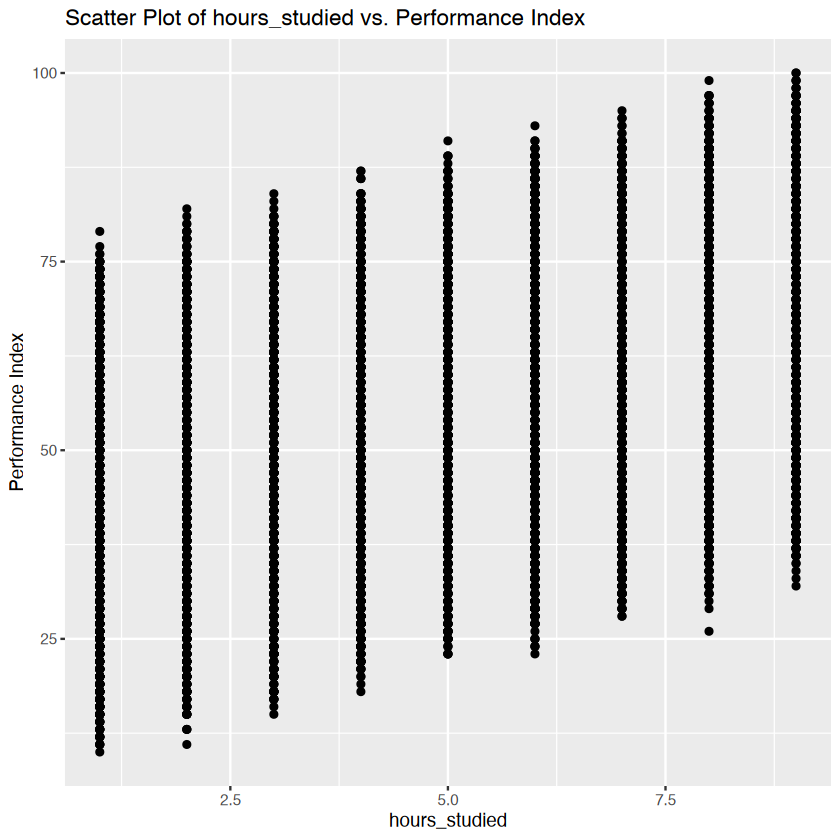

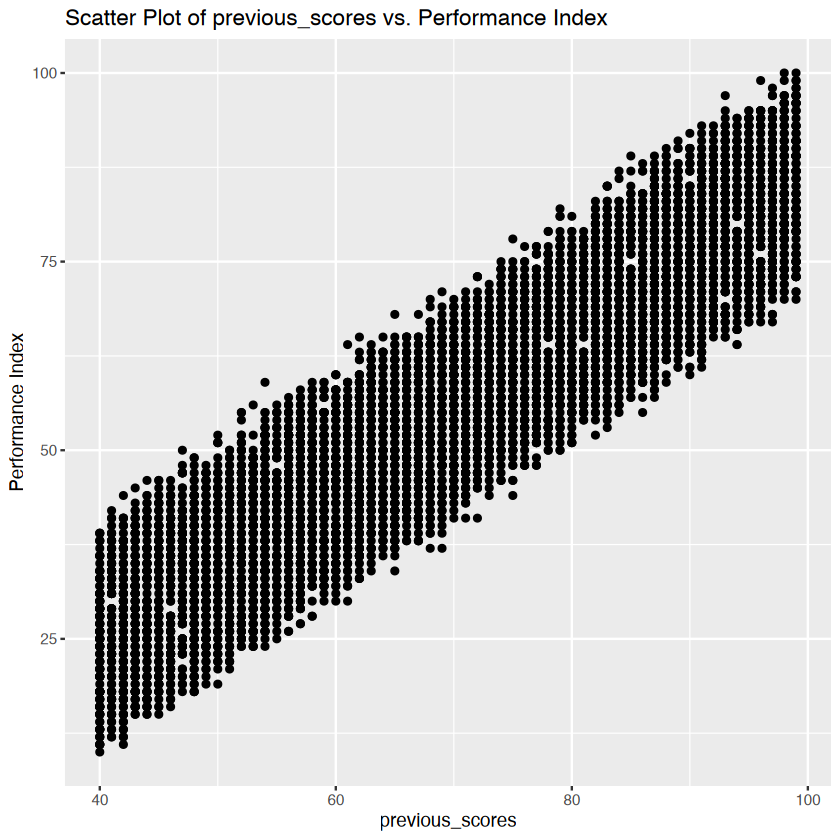

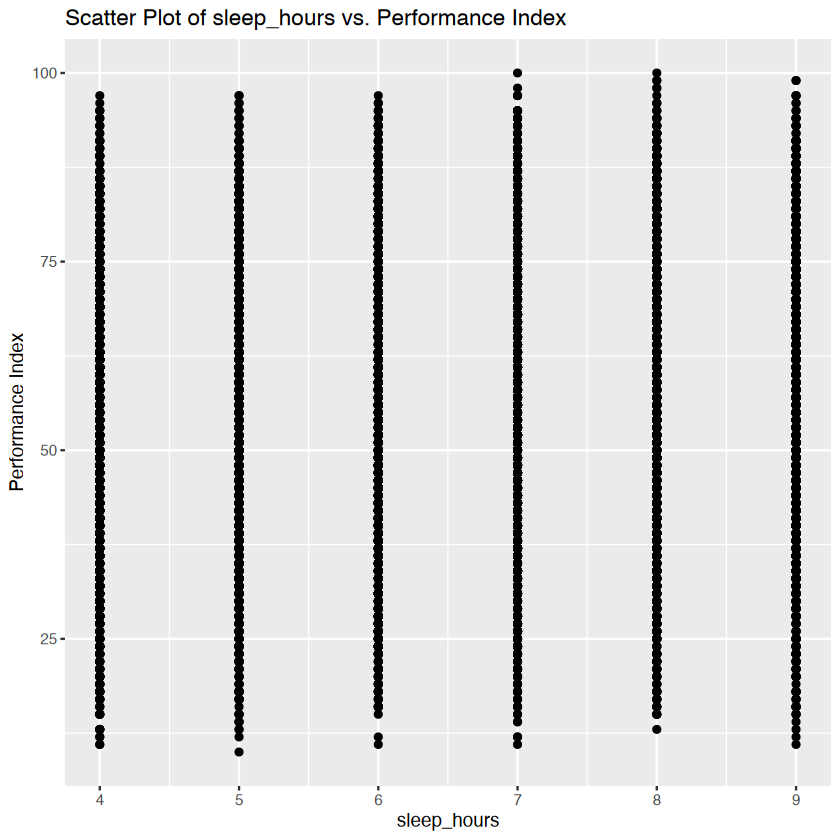

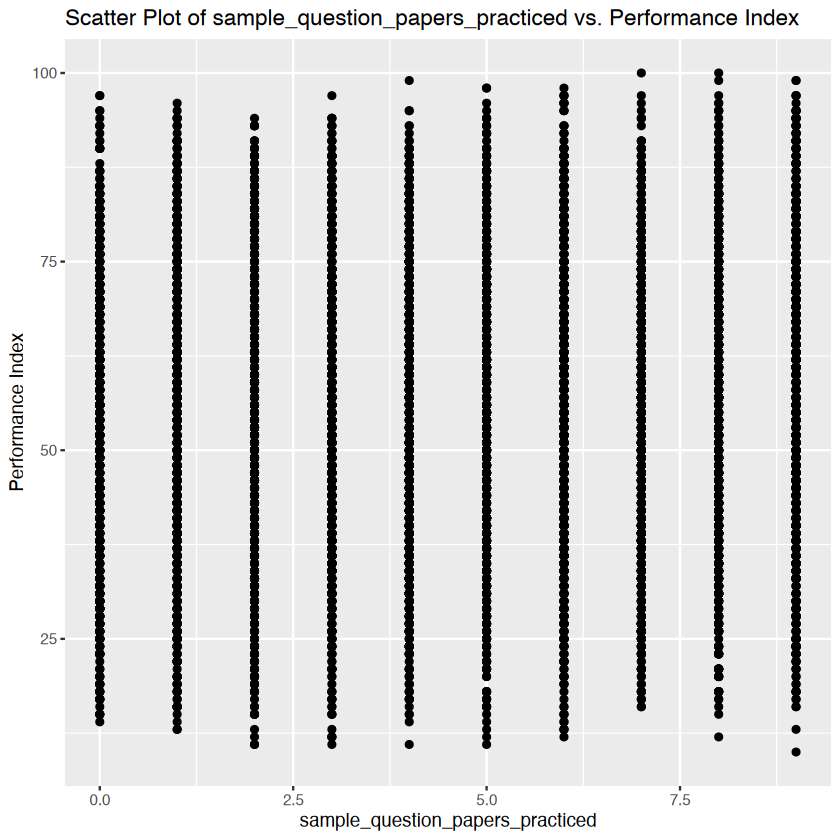

In [52]:
# scatter plot for each feature vs response (performance_index)
for (i in names(train_sp %>% select(hours_studied:sample_question_papers_practiced))){
    sp <- ggplot(train_sp)+
    geom_point(aes(x = .data[[i]], y = performance_index))+
    labs(x = i, y = "Performance Index") +
    ggtitle(paste("Scatter Plot of", i, "vs. Performance Index"))
    print(sp)
}

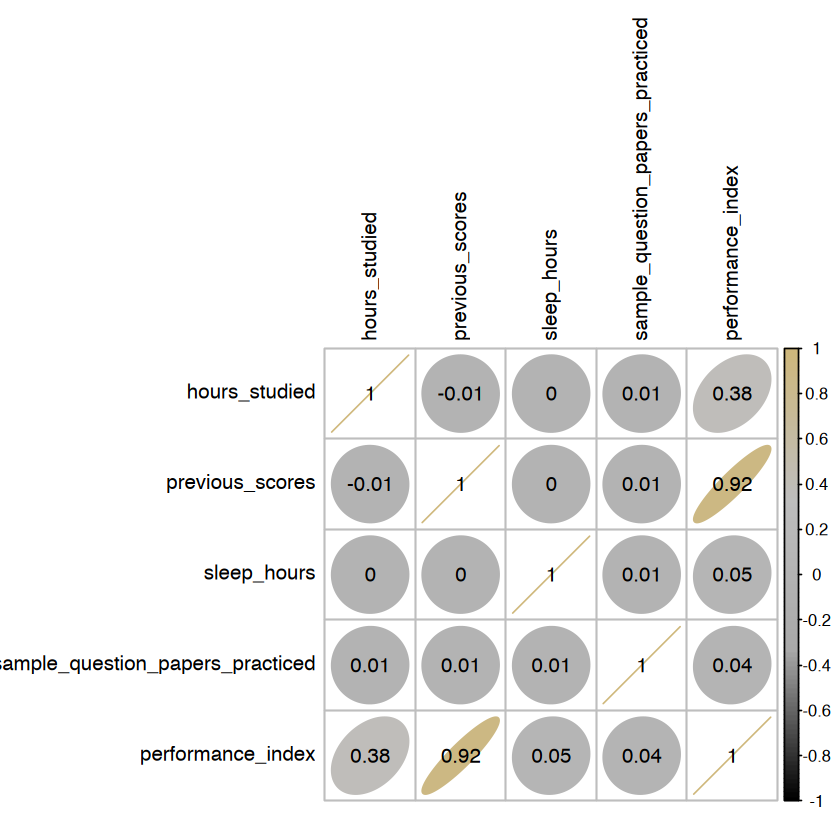

In [53]:
# correlation matrix for features vs response (performance index)
library(corrplot)
color_pal = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(train_sp[,-6]), method = "ellipse", col = color_pal(100),  addCoef.col = "black", tl.col = "black")

#### Interpretation:
1. There is a strong positive correlation between previous_score and performance_index.
2. There is a weak to moderate positive correlation between hours_studied and performance_index.
3. There is no significant relationship between sleep_hours and sample_question_papers_practiced as the correlation coeffficient is close to 0.

### Fitting seperate SLR models for each feature and t-test.

# 4. t-test:

Null Hypothesis ($H_0$): There is no relationship between the feature and response. Slope coefficient of feature j ($\beta_j$) = 0

Alternative Hypothesis ($H_A$): There is a statistically significant relationship between the feature and response. Slope Coefficient of feature j ($\beta_j$) $\ne$ 0

Significance Level ($\alpha$) = 5% = 0.05

t-stat = $\frac{\widehat\beta_j - \beta_j}{\widehat se(\widehat\beta_j)}$

In [54]:
# SLR model for hours_studied
slr_model_hs <- lm(formula = performance_index ~ hours_studied, data = train_sp)
summary(slr_model_hs)


Call:
lm(formula = performance_index ~ hours_studied, data = train_sp)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.641 -15.051  -0.256  15.540  35.744 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   41.27961    0.43603   94.67   <2e-16 ***
hours_studied  2.79519    0.07773   35.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.77 on 7810 degrees of freedom
Multiple R-squared:  0.1421,	Adjusted R-squared:  0.1419 
F-statistic:  1293 on 1 and 7810 DF,  p-value: < 2.2e-16


From the above summary output,

Slope Coefficient of hours_studied = 2.79519 

Standard Error of hours_studied = 0.07773

$t_{stat} = \frac{2.79519 - 0}{0.07773}$

$t_{stat} = 35.96$

It is same as the t value in summary output.

p-value from summary output is significantly less than the significance level ($\alpha$) = 5% = 0.05

So, I have strong evidence to reject my null hypothesis in favour of alternative hypothesis and conclude that there is a statistically significant relationship between hours_studied and performance_index.

SLR model is: $\widehat {performance\_index}_{hours\_studied} = 41.27961 + 2.79519 * hours\_studied$

In [55]:
# SLR model for previous_scores
slr_model_ps <- lm(formula = performance_index ~ previous_scores, data = train_sp)
summary(slr_model_ps)


Call:
lm(formula = performance_index ~ previous_scores, data = train_sp)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.731  -6.449   0.003   6.367  19.504 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -15.350341   0.361542  -42.46   <2e-16 ***
previous_scores   1.015667   0.005051  201.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.719 on 7810 degrees of freedom
Multiple R-squared:  0.8381,	Adjusted R-squared:  0.8381 
F-statistic: 4.043e+04 on 1 and 7810 DF,  p-value: < 2.2e-16


From the above summary output,

Slope Coefficient of previous_scores = 1.015667

Standard Error of hours_studied = 0.005051

$t_{stat} = \frac{1.015667 - 0}{0.005051}$

$t_{stat} = 201.07$

It is same as the t value in summary output.

p-value from summary output is significantly less than the significance level ($\alpha$) = 5% = 0.05

So, I have strong evidence to reject my null hypothesis in favour of alternative hypothesis and conclude that there is a statistically significant relationship between previous_scores and performance_index.

SLR model is: $\widehat {performance\_index}_{previous\_scores} = -15.350341 + 1.015667 * previous\_scores$

In [56]:
# SLR model for sleep_hours
slr_model_sh <- lm(formula = performance_index ~ sleep_hours, data = train_sp)
summary(slr_model_sh)


Call:
lm(formula = performance_index ~ sleep_hours, data = train_sp)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.548 -15.001   0.093  15.253  44.546 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  51.6250     0.8631  59.814  < 2e-16 ***
sleep_hours   0.5470     0.1281   4.271 1.97e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.16 on 7810 degrees of freedom
Multiple R-squared:  0.00233,	Adjusted R-squared:  0.002203 
F-statistic: 18.24 on 1 and 7810 DF,  p-value: 1.967e-05


From the above summary output,

Slope Coefficient of previous_scores = 0.5470

Standard Error of hours_studied = 0.1281

$t_{stat} = \frac{0.5470 - 0}{0.1281}$

$t_{stat} = 4.271$

It is same as the t value in summary output.

p-value from summary output is significantly less than the significance level ($\alpha$) = 5% = 0.05

So, I have strong evidence to reject my null hypothesis in favour of alternative hypothesis and conclude that there is a statistically significant relationship between sleep_hours and performance_index.

SLR model is: $\widehat {performance\_index}_{sleep\_hours} = 51.6250 + 0.5470 * sleep\_hours$

In [57]:
# SLR model for sample_question_papers_practiced
slr_model_sqpp <- lm(formula = performance_index ~ sample_question_papers_practiced, data = train_sp)
summary(slr_model_sqpp)


Call:
lm(formula = performance_index ~ sample_question_papers_practiced, 
    data = train_sp)

Residuals:
   Min     1Q Median     3Q    Max 
-46.35 -15.05  -0.04  15.43  44.17 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      53.98920    0.40803 132.316  < 2e-16 ***
sample_question_papers_practiced  0.26278    0.07543   3.484 0.000497 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.17 on 7810 degrees of freedom
Multiple R-squared:  0.001552,	Adjusted R-squared:  0.001424 
F-statistic: 12.14 on 1 and 7810 DF,  p-value: 0.0004968


From the above summary output,

Slope Coefficient of previous_scores = 0.26278

Standard Error of hours_studied = 0.07543

$t_{stat} = \frac{0.26278 - 0}{0.07543}$

$t_{stat} = 3.484$

It is same as the t value in summary output.

p-value is significantly less than the significance level ($\alpha$) = 5% = 0.05

So, I have strong evidence to reject my null hypothesis in favour of alternative hypothesis and conclude that there is a statistically significant relationship between sample_question_papers_practiced and performance_index.

SLR model is: $\widehat {performance\_index}_{sample\_question\_papers\_practiced} = 53.98920 + 0.26278 * sample\_question\_papers\_practiced$

### Fitting MLR model

In [58]:
# MLR model for performance_index on all features
mlr_model_sp = lm(formula = performance_index ~ ., data =  train_sp)
summary(mlr_model_sp)


Call:
lm(formula = performance_index ~ ., data = train_sp)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3488 -1.3896  0.0021  1.3609  8.4958 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -33.757343   0.144050 -234.34   <2e-16 ***
hours_studied                      2.846059   0.009045  314.64   <2e-16 ***
previous_scores                    1.018621   0.001353  752.80   <2e-16 ***
sleep_hours                        0.480899   0.013820   34.80   <2e-16 ***
sample_question_papers_practiced   0.196002   0.008136   24.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.068 on 7807 degrees of freedom
Multiple R-squared:  0.9884,	Adjusted R-squared:  0.9884 
F-statistic: 1.661e+05 on 4 and 7807 DF,  p-value: < 2.2e-16


MLR model is: 

$\widehat {performance\_index} = -33.757343 + 2.846059 * hours\_studied $

$+ 1.018621 * previous\_scores + 0.480899 * sleep\_hours + 0.196002 * sample\_question\_papers\_practiced$

# 5. Model Selection

In [59]:
library(leaps)
library(MASS)

n = dim(sp_df)[1]; 
# using regsubsets() function in the leaps library to find best model for each size
best_models = regsubsets(performance_index ~ ., data = train_sp)
best_models_summary = summary(best_models)
best_models_summary$which


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




,(Intercept),hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced
1,TRUE,FALSE,TRUE,FALSE,FALSE
2,TRUE,TRUE,TRUE,FALSE,FALSE
3,TRUE,TRUE,TRUE,TRUE,FALSE
4,TRUE,TRUE,TRUE,TRUE,TRUE


The table above provides the best model (in terms of RSS) of size $k$, for $k = 1,2,...,7$. For example, the best simple linear regression model is the model `performance\_index` = $\widehat\beta_0 + \widehat\beta_1 \times$ `previous\_scores`. 

Now, to compare these models with each other, AIC, BIR and $R^2_a$ are plotted below for best model for each size.

# Calculating AIC values

$$AIC\left(g\left(\mathbf{x}; \widehat{\boldsymbol\beta}\right) \right) = 2(p+1) + n\log(RSS/n).$$


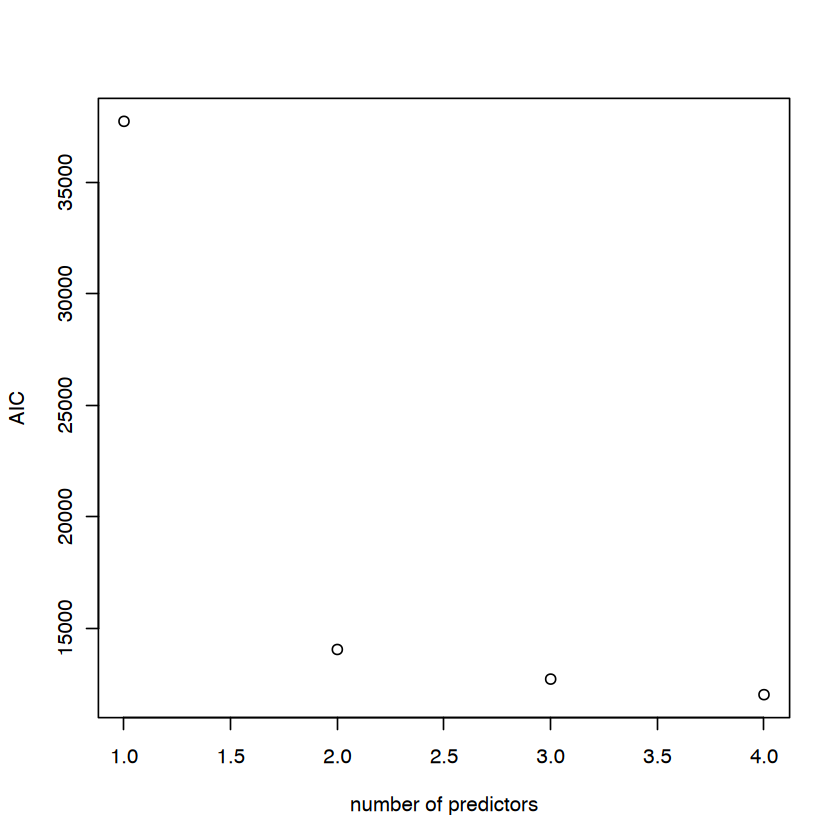

In [61]:
# plotting AIC values for the best model for each size
AIC_scores = 2*(2:5) + n*log(best_models_summary$rss/n) 
plot(AIC_scores ~ I(1:4), xlab = "number of predictors", ylab = "AIC")

From the above plot, the model of size $k = 4$ has the lowest AIC. The model selection procedure has chosen:

`performance_index` = $\widehat\beta_0 + \widehat\beta_1 \times$ `hours_studied` $ + \widehat\beta_2 \times$ `previous_scores` $ + \widehat\beta_3 \times$ `sleep_hours`+ $\widehat\beta_3 \times$ `sample_question_papers_practiced`.

# Calculating BIC values

$$BIC\left(g\left(\mathbf{x}; \widehat{\boldsymbol\beta}\right) \right) = (p+1)\log(n) -2\log L\left(\widehat{\boldsymbol\beta} \right),$$


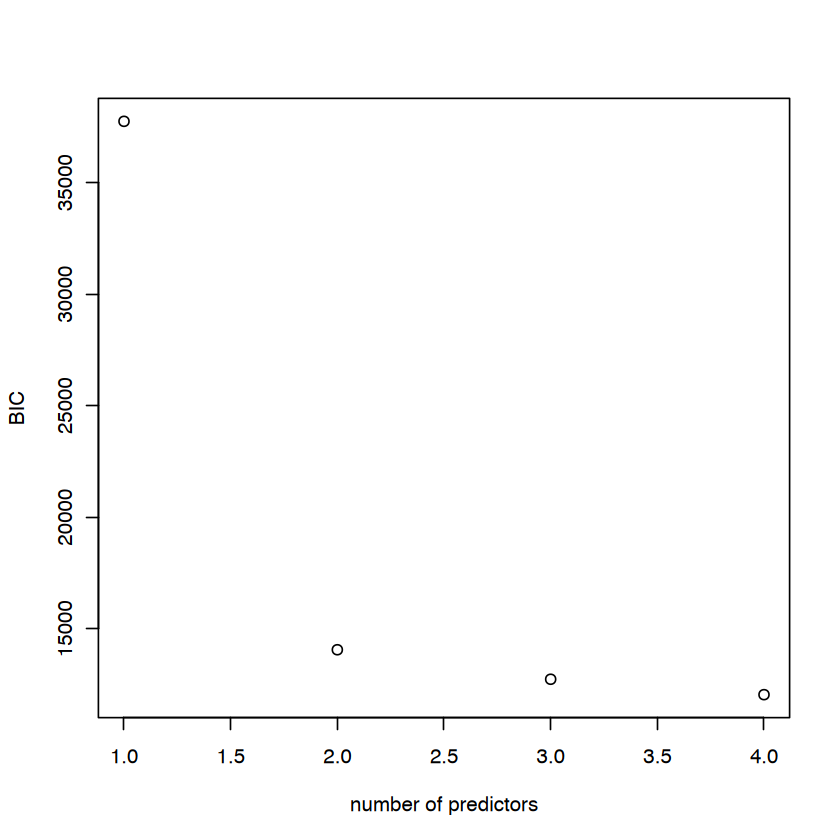

In [62]:
# plotting BIC values for the best model for each size
BIC_scores = log(n)*(2:5) + n*log(best_models_summary$rss/n) 
plot(BIC_scores ~ I(1:4), xlab = "number of predictors", ylab = "BIC")

From the above plot, the model of size $k = 4$ has the lowest BIC The model selection procedure has chosen:

`performance_index` = $\widehat\beta_0 + \widehat\beta_1 \times$ `hours_studied` $ + \widehat\beta_2 \times$ `previous_scores` $ + \widehat\beta_3 \times$ `sleep_hours`+ $\widehat\beta_3 \times$ `sample_question_papers_practiced`.

# Calculating Adjusted R^2 values

$$R_a^2 = 1 - \frac{RSS\big/\left(n-(p+1)\right)}{TSS\big/\left(n -1 \right)},$$


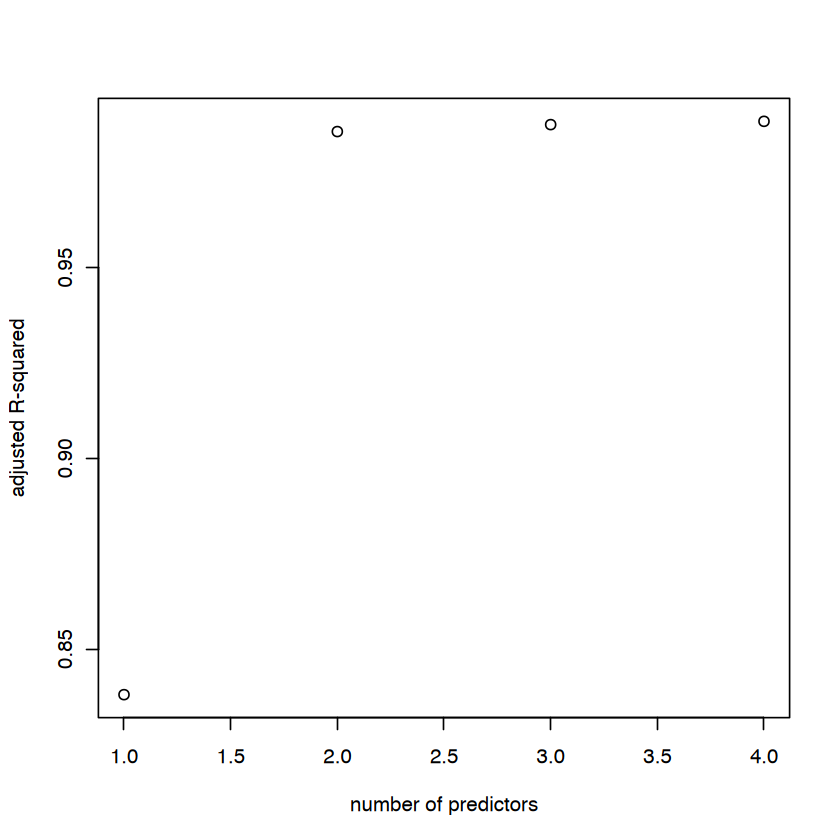

In [64]:
# plotting R2a values for the best model for each size
plot(1:4, best_models_summary$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared")

From the above plot, the model of size $k = 4$ has the highest $R^2_a$. The model selection procedure has chosen:

`performance_index` = $\widehat\beta_0 + \widehat\beta_1 \times$ `hours_studied` $ + \widehat\beta_2 \times$ `previous_scores` $ + \widehat\beta_3 \times$ `sleep_hours`+ $\widehat\beta_3 \times$ `sample_question_papers_practiced`.

# Calculating R^2 values

$$R^2 = 1 - \frac{RSS}{TSS}$$


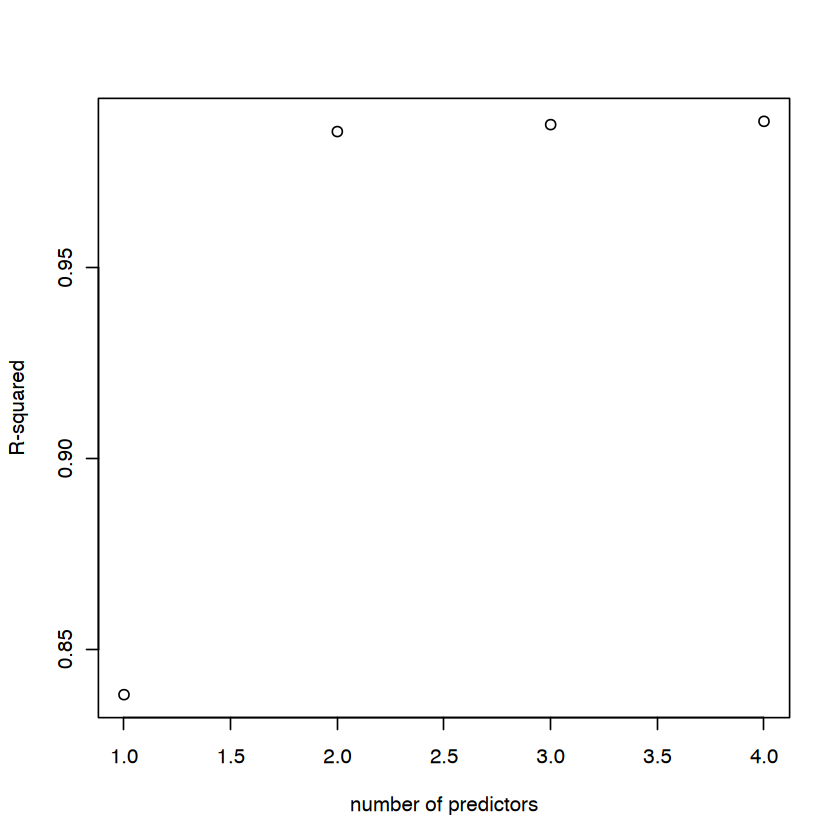

In [65]:
# plotting R2 values for the best model for each size
plot(1:4, best_models_summary$rsq, xlab = "number of predictors", ylab = "R-squared")

From the above plot, the model of size $k = 4$ has the highest $R^2$. The model selection procedure has chosen:

`performance_index` = $\widehat\beta_0 + \widehat\beta_1 \times$ `hours_studied` $ + \widehat\beta_2 \times$ `previous_scores` $ + \widehat\beta_3 \times$ `sleep_hours`+ $\widehat\beta_3 \times$ `sample_question_papers_practiced`.

# Calculating MSPE values

\begin{align*}
MSPE = \frac{1}{k}\sum^k_{i=1}\left(y^\star_i - \widehat{y}^\star_i \right)^2 
\end{align*}

In [66]:
# Fitting best model for each size separately
model1 <- lm(performance_index ~ previous_scores, data = train_sp)
model2 <- lm(performance_index ~ previous_scores + hours_studied, data = train_sp)
model3 <- lm(performance_index ~ previous_scores + hours_studied + sleep_hours, data = train_sp)
model4 <- lm(performance_index ~ ., data = train_sp)

# Computing MSPE for each model
mspe <- c(
  mean((test_sp$performance_index - predict(model1, newdata = test_sp))^2),
  mean((test_sp$performance_index - predict(model2, newdata = test_sp))^2),
  mean((test_sp$performance_index - predict(model3, newdata = test_sp))^2),
  mean((test_sp$performance_index - predict(model4, newdata = test_sp))^2)
)

# Printing MSPE for each model size
print(mspe)

[1] 61.168870  5.297052  4.687304  4.400932


From the above, MSPE is least for model4. The model selection procedure has chosen:

`performance_index` = $\widehat\beta_0 + \widehat\beta_1 \times$ `hours_studied` $ + \widehat\beta_2 \times$ `previous_scores` $ + \widehat\beta_3 \times$ `sleep_hours`+ $\widehat\beta_3 \times$ `sample_question_papers_practiced`.

All the model selection techniques selected the same model as the best model.

`performance_index` = $\widehat\beta_0 + \widehat\beta_1 \times$ `hours_studied` $ + \widehat\beta_2 \times$ `previous_scores` $ + \widehat\beta_3 \times$ `sleep_hours`+ $\widehat\beta_3 \times$ `sample_question_papers_practiced`.

# 5. F-test

From the above model selection techniques, there is not much change in metrics from best model with 2 features to best model with 4 features.

### Lets see whether reduced model (best model with 2 features) is sufficient.

### Partial F-test:

Null Hypothesis ($H_0$): Reduced Model is sufficient.

Alternative Hypothesis ($H_A$): Reduced Model is not sufficient. Full Model is required.

Significance Level ($\alpha$) = 5% = 0.05

$F = \frac{\frac{SSE_{reduced} - SSE_{full}}{p}}{\frac{SSE_{full}}{n - p -1}}$

where, 

p is number of features in the full model,

K is number of features in the reduced model.

In [67]:
anova(model2, model4)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7809,41099.02,NA,NA,NA,NA
2,7807,33379.07,2,7719.957,902.8069,0


From the above partial F-test result, p-value = 0 is significantly less than the significance level ($\alpha$) = 5% = 0.05.

So, I have strong evidence to reject my null hypothesis in favour of alternative hypothesis and conclude that the Reduced model is not sufficient.

So, Full model is required.

# 6. Model Diagnostics

### Homoscedasticity(constant variance): 
The assumption is that the spread of error is constant across the range of fitted values. 

It can be assessed using Residuals vs Fitted plot.


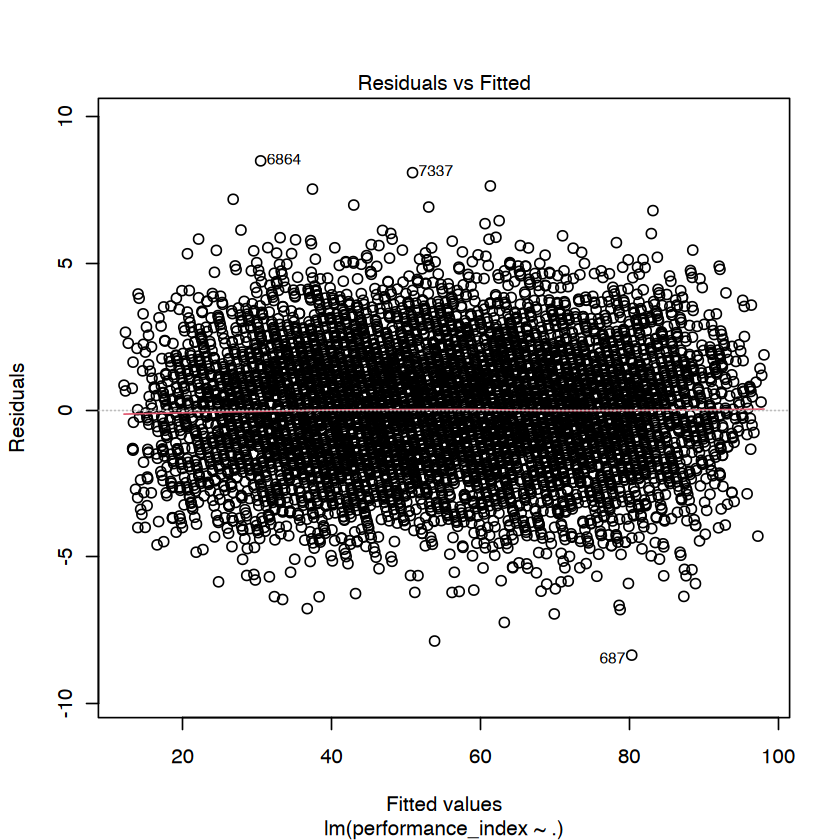

In [68]:
# plotting Residuals vs Fitted values to check for constant variance
plot(model4, which = 1)

From the above Residuals vs Fitted values plot, the spread of residuals is constant across the range of fitted values.

It indicates that the variance is constant (homoscedasticity).

### Multivariate Normality:
The assumption is that the residuals are nomally distributed. 

It can be assessed using the Normal Q-Q plot.

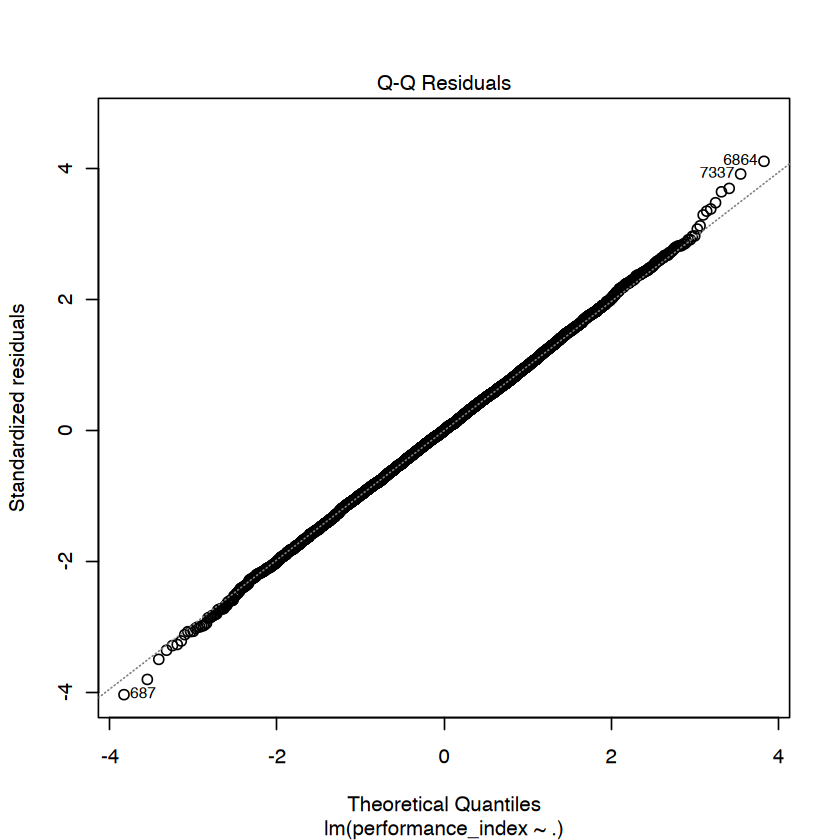

In [69]:
# plotting Q-Q plot to check normality
plot(model4, which = 2)

From the above Q-Q plot, I could interpret that the distribution is short tailed i.e, at end the points deviate from the line. Since the points approximately follows the line, the consequences of non-normality are not serious. 

So, the residuals are normally distributed.

### Linearity:

The assumption is that there is Linear relationship between response and the predictors. 

It can be assessed using Scale-Location plot.

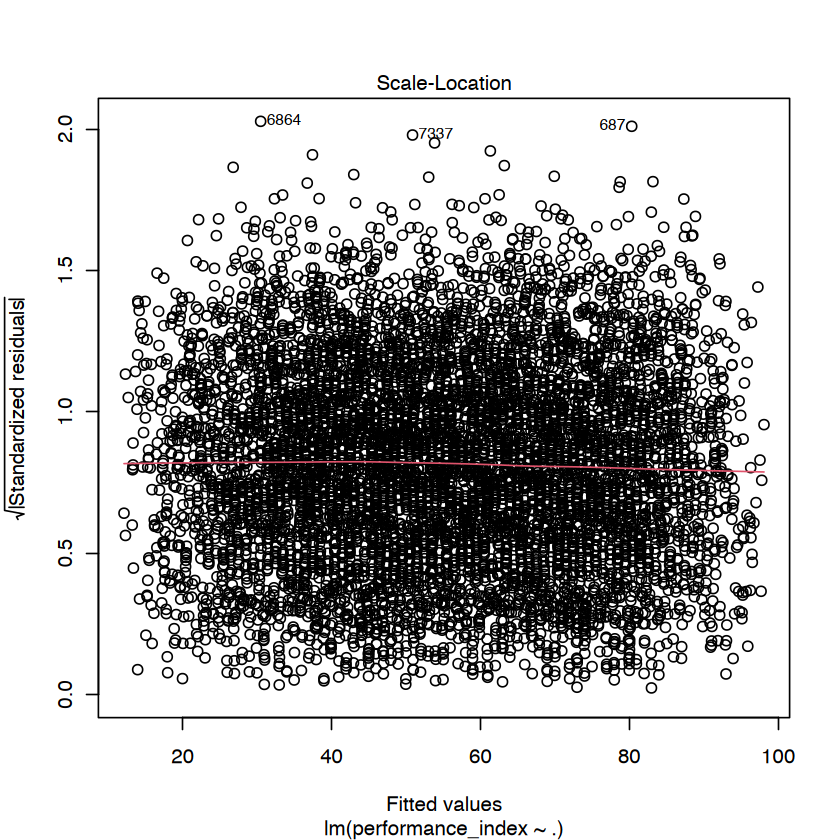

In [70]:
# plotting Square root of standardized residuals vs Fitted values to check for linearity
plot(model4, which = 3)

From the above Scale-Location plot, I could interpret that linearity assumption is satisfied as there is no curvature.

### No Multicollinearity (Independence): 

The assumption is that the predictors are not highly correlated with each other. 

It can be assessed using Successive Residual plot.

[1] 0.007566276

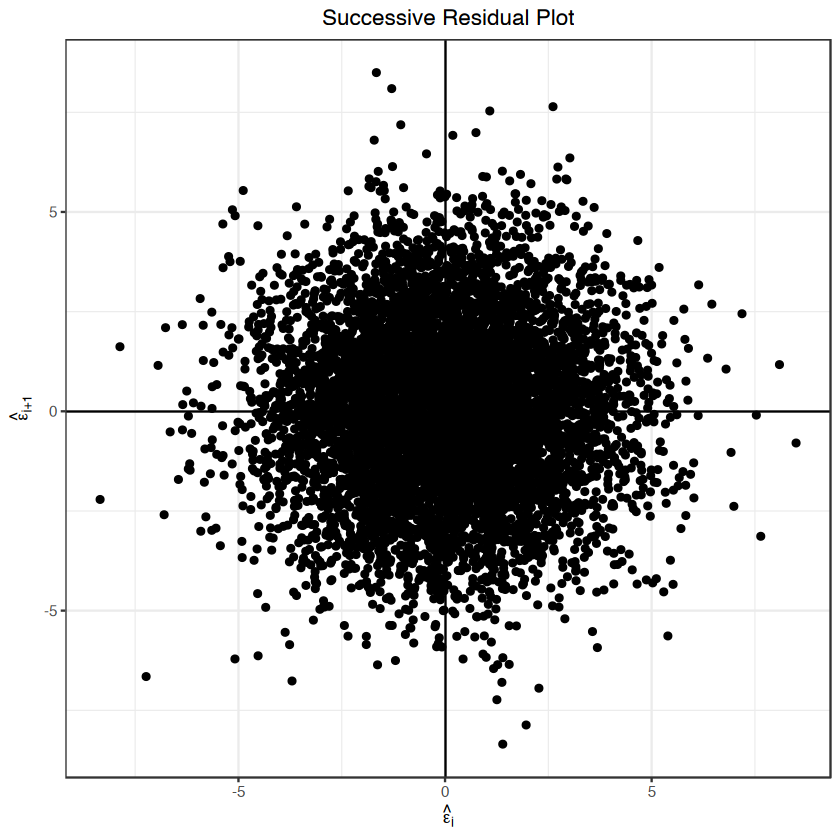

In [72]:
# plotting successive residuals plot to check independence.
n = dim(train_sp)[1]; 
x = head(residuals(model4), n-1)
y = tail(residuals(model4), n-1)
cor(x,y)
srp = data.frame(x,y)
ggplot(srp, aes(x = x, y = y)) + 
    geom_point() + 
    geom_vline(xintercept = 0) + 
    geom_hline(yintercept = 0) + 
    xlab(expression(hat(epsilon)[i])) +
    ylab(expression(hat(epsilon)[i+1])) + 
    ggtitle("Successive Residual Plot") + 
    theme_bw() + 
    theme(plot.title = element_text(hjust = 0.5)) 

From the above Successive Residual Plot, I could interpret that there is no clear correlation as the points are randomly scattered.

So, there is no Multicollinearity (Independence) and the assumption is not violated.

In [73]:
# Checking Variance Inflation Factor for multi collinearity
library(car)
vif(model4)
kappa(model4)
cor(model.matrix(model4)[,-1])

Loading required package: carData


Attaching package: ‘carData’


The following objects are masked from ‘package:BSDA’:

    Vocab, Wool



Attaching package: ‘car’


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:dplyr’:

    recode




hours_studied                  previous_scores 
                        1.000180                         1.000125 
                     sleep_hours sample_question_papers_practiced 
                        1.000106                         1.000220

[1] 292.5316

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced
hours_studied,1.000000000,-0.007941916,0.003010752,0.01036554
previous_scores,-0.007941916,1.000000000,0.004821507,0.00617016
sleep_hours,0.003010752,0.004821507,1.000000000,0.00864591
sample_question_papers_practiced,0.010365543,0.006170160,0.008645910,1.00000000


1. The VIF for the estimators are in the "Low multi collinearity" range (i.e., $VIF < 5$), which is acceptable.

2. The condition number (kappa value) is very high ($>> 30$), suggesting multi collinearity is an issue.

3. The correlation matrix for the predictors shows very weak pairwise correlations.

So, overall the best model is not showing any evidence of multi collinearity.

To conclude, the best model did not violate any of the assumptions (Homoscedasticity, Normality, Linearity anb No Multi Collinearity).

# 7. ANOVA

In [75]:
# printing the summary of hours_studied 
summary(sp_df$hours_studied)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   5.000   4.992   7.000   9.000 

### Creating 3 groups by randomly sampling 100 performance index values based on hours studied (low, moderate and high).

In [76]:
set.seed(123)

# creating 3 groups for hours_studied
low = sample(sp_df$performance_index[sp_df$hours_studied < 4], 100)
moderate = sample(sp_df$performance_index[sp_df$hours_studied >= 4 & sp_df$hours_studied <=6], 100)
high = sample(sp_df$performance_index[sp_df$hours_studied > 6], 100)

# creating data frame with low, moderate and high values
anova_df = data.frame(low,moderate,high)
head(anova_df)

,low,moderate,high
,<int>,<int>,<int>
1,34,56,38
2,21,57,70
3,43,36,86
4,67,57,64
5,45,53,62
6,50,52,49


In [77]:
# gathering data into group and value using gather funciton in tidyverse
library(tidyr)
longdata = gather(anova_df, group, value)
head(longdata)

,group,value
,<chr>,<int>
1,low,34
2,low,21
3,low,43
4,low,67
5,low,45
6,low,50


Null Hypothesis ($H_0$): The means of each group are the same.

Alternative Hypothesis ($H_A$): At least one pair of means is not equal.

Significance level ($\alpha$) = 5% = 0.05

In [78]:
# using oneway test from stats package
library(stats)

anova_result = oneway.test(value ~ group, longdata, var.equal=TRUE)
anova_result


	One-way analysis of means

data:  value and group
F = 15.792, num df = 2, denom df = 297, p-value = 3.036e-07


##### From the above one-way test, p-value is less than the significance level ($\alpha$) = 0.05. So, I have strong evidence to reject my null hypothesis in favour of alternative hypothesis and conclude that at least one pair is means is not equal.

ANOVA F-test is equivalent to linear regression where the features are binary categorical variables associated with group membership.

In [79]:
library(dplyr)

# creating binary features and storing these categorical features along with the performance index values 
# x1 to indicate membership in moderate group
# x2 to indicate membership in high group

x1 = as.integer(longdata$group == "moderate")
x2 = as.integer(longdata$group == "high")
x1
x2

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1

In [80]:
y = longdata$value
dfRegress = data.frame(y, x1, x2)
head(dfRegress)

,y,x1,x2
,<int>,<int>,<int>
1,34,0,0
2,21,0,0
3,43,0,0
4,67,0,0
5,45,0,0
6,50,0,0


In [81]:
anova_regression = lm( y ~ ., data = dfRegress)
summary(anova_regression)


Call:
lm(formula = y ~ ., data = dfRegress)

Residuals:
   Min     1Q Median     3Q    Max 
-37.33 -15.80   0.20  16.91  34.81 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   49.330      1.853  26.621  < 2e-16 ***
x1             4.860      2.621   1.855   0.0647 .  
x2            14.470      2.621   5.522 7.33e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.53 on 297 degrees of freedom
Multiple R-squared:  0.09612,	Adjusted R-squared:  0.09004 
F-statistic: 15.79 on 2 and 297 DF,  p-value: 3.036e-07


F-stat and p-value are same as the one-way anova test

### Tukey's Honest Significant Difference (HSD) test to determine which group(s) are statistically different

In [82]:
pi.aov = aov(value ~ group, longdata)
summary(pi.aov)

             Df Sum Sq Mean Sq F value   Pr(>F)    
group         2  10845    5423   15.79 3.04e-07 ***
Residuals   297 101981     343                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [83]:
tukey.test = TukeyHSD(pi.aov)
tukey.test

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ group, data = longdata)

$group
                diff        lwr       upr     p adj
low-high      -14.47 -20.642842 -8.297158 0.0000002
moderate-high  -9.61 -15.782842 -3.437158 0.0008465
moderate-low    4.86  -1.312842 11.032842 0.1539273


- **diff:** It is the difference between the means of the two groups.
- **lwr, upr**: It gives the lower and the upper threshold of the Confidence Interval respectively. (default = 95%).
- **p adj**: It is p-value after adjustment for multiple comparisons.

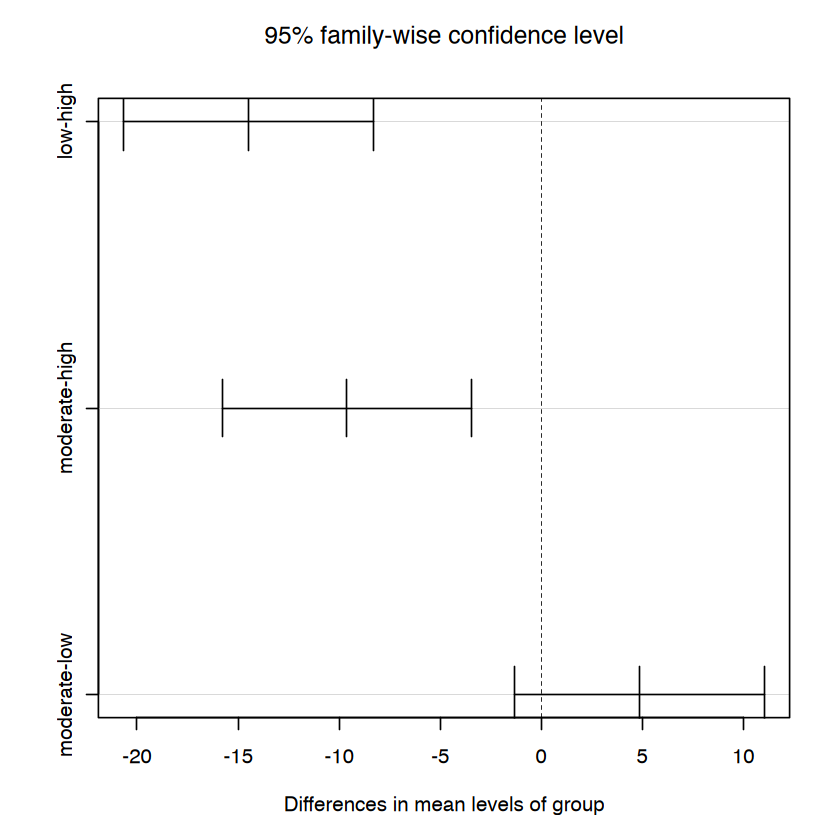

In [84]:
plot(tukey.test)

From the above, the groups low and high, as well as moderate and high are statistically significantly different from each other as the p-value is significantly less than the significance level ($\alpha$) = 0.05. low and moderate are not significantly different from each other.

Assumptions of the ANOVA test: 
- The observations are independent and randomly obtained from the population defined by the factor levels.
- The data in each group (factor level) is normally distributed.
- The data in each group has the same variance (homogeneity of variances).

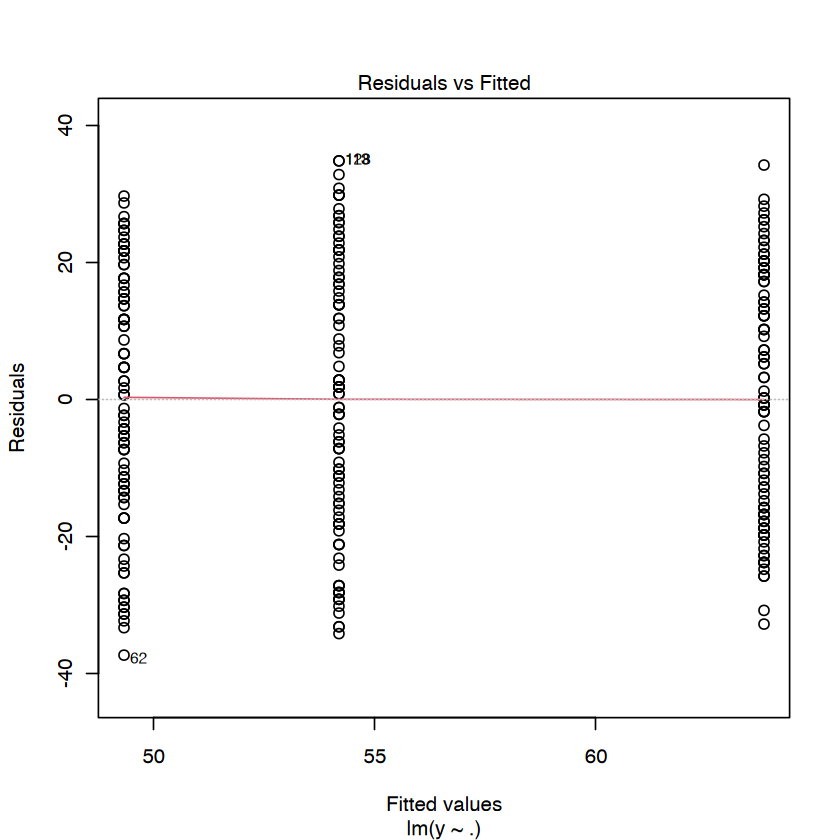

In [85]:
# plotting residuals vs fitted to check for confidence interval
plot(anova_regression, 1)

From the above residuals vs fitted plot, I could interpret that the spread of variance is constant across the range of fitted values. It indicates that the variance is constant.

#### Levene Test
Null Hypothesis ($H_0$): Variance is constant across all the groups.

Alternative Hypothesis ($H_A$): variance is not constant across all the groups.

Significance Level ($\alpha$) = 5% = 0.05

In [86]:
install.packages("car")
library(car)
leveneTest(value ~ group, longdata)


The downloaded binary packages are in
	/var/folders/gk/64vmdqys05vfzj3ywcq327z00000gn/T//Rtmpw4FXjB/downloaded_packages


Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.5725138,0.5647269
,297,NA,NA


From the above test, since the p-value is greater than significance level, there is no strong evidence to reject the null hypothesis. 

So, homogeineity of variance assumption is not violated.

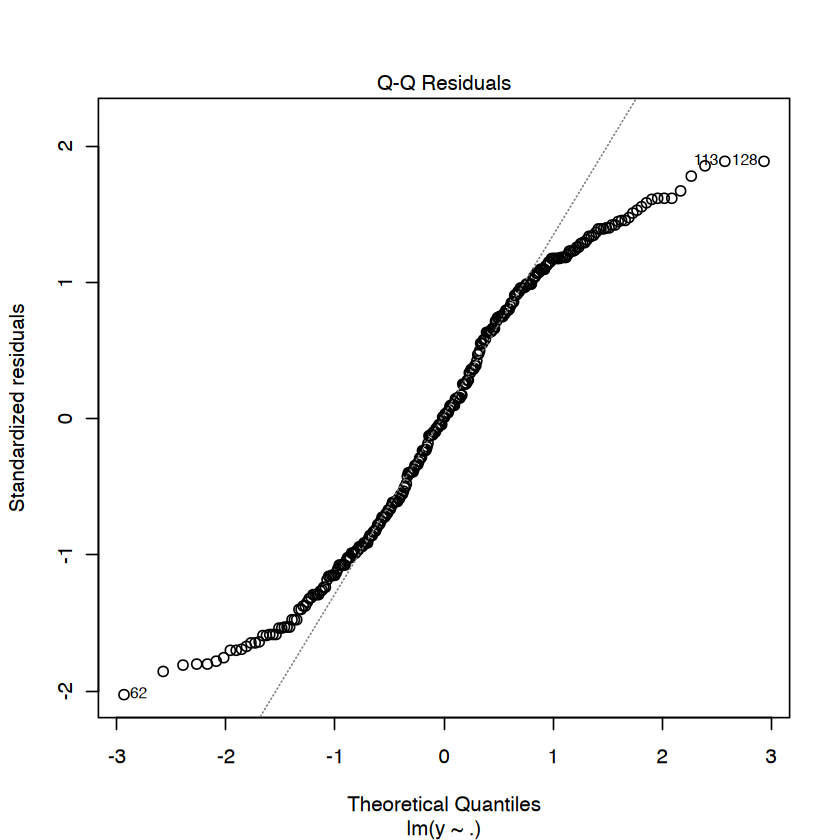

In [87]:
# plotting Q-Q residuals plot to check for normality
plot(anova_regression, 2)

From the above Q-Q plot, I could interpret that the distribution is long tailed and the consequences of non-normality are serious. 

So, normality assumption is violated.

#### Shapiro-Wilk test to verify normality.

Null Hypothesis ($H0$): Residuals are normal

Alternate Hypothesis ($H_A$): Residuals are not normal.

significance level (α) = 5% = 0.05

In [88]:
# Shapiro-Wilk test.
aov_residuals = residuals(object = pi.aov)
shapiro.test(x = aov_residuals)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.96053, p-value = 2.897e-07


Since the p-value is less than the significance level, there is strong evidence to reject my null hypothesis and conclude that normality assumption is violated.

#### Since the assumptions of one-way ANOVA are not met. I will use a non-parametric test called the Kruskal-Wallis rank sum test.

Null Hypothesis ($H_0$): The means of each group are the same.

Alternative Hypothesis ($H_A$): At least one pair of means is not equal.

Significance level ($\alpha$) = 5% = 0.05

In [89]:
# kruskal-wallis rank sum test
kruskal.test(value ~ group, data = longdata)


	Kruskal-Wallis rank sum test

data:  value by group
Kruskal-Wallis chi-squared = 26.404, df = 2, p-value = 1.847e-06


#### From the above  test, p-value is less than the significance level ($\alpha$) = 0.05. So, I have strong evidence to reject my null hypothesis in favour of alternative hypothesis and conclude that at least one pair is means is not equal.

#### Determining which pairs are different using pairwise wilcox test

In [90]:
pairwise.wilcox.test(longdata$value, longdata$group)


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  longdata$value and longdata$group 

         high    low   
low      1.5e-06 -     
moderate 0.0016  0.0829

P value adjustment method: holm 

#### From the above, the groups low and high, as well as moderate and high are statistically significantly different from each other as the p-value is significantly less than the significance level ($\alpha$) = 0.05. low and moderate are not significantly different from each other.

# <center>Report</center>



# 1. Introduction/Background

As a student it is interesting to see what are different factors that influence the students performance index. This project aims to see how different factors like hours studied, previous scores, sleep hours and sample question papers practiced contribute to the performance index of the student. Further, it is interesting to explore how students in different groups based on hours studied perform.

To understand this study one needs to know about the different features that influence the student's performance index. Basically the features in this study are hours studied, previous scores, sleep hours and sample question papers practiced. Having basic idea about these and how they may relate to the performance index helps in understanding different reasearch questions which navigates this project.

There are numerous studies that are related to students performance index based on different features but the research questions in this study are not related to any of the previous research works.

I collected the dataset for this study to answer the research questions on the factors that influence the perfromance index of the student. This dataset is sourced from Kaggle. 


Link: [student performance dataset](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?select=Student_Performance.csv).

# 2. Questions of Interest
1. Are there any outliers present in the data?
2. Is there any difference in performance index of students who studied more compared to students who studied less?
3. Does the students who studied more has good performance index (>50) compared to students who studied less or the is it independent of hours studied?
4. How different features are correlated with the performance index?
5. Does all the features have statistically significant realtionship with the performance index?
6. what is the best simple linear regression model (model with only one feature)?
7. What are the best models according to different model selection techniques like AIC, BIC, $R^2$, $R_a^2$ and MSPE?
8. Are all the feature important in predicting the performance index? Is the full model best or any other reduced model sufficient?
9. Does the best model violates any modelling assumptions?
10. Does the best model show any evidence of multi collinearity?
11. Consider 3 random samples of students each representing a study group based on hours studied in range of low, moderate and high. Does all the study groups have same mean performance index? Are all the study groups statistically significantly same? Is ANOVA suitable for this analysis or in other words does any assumption of ANOVA is violated? If any assumption is violated which test is suitable for this? Does this suitable test give same result as the ANOVA?


# 3. Methods and Results

### 3.1 About Data:
Dataset for this study to answer the research questions on the factors that influence the perfromance index of the student is sourced from Kaggle. Link: [student performance dataset](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?select=Student_Performance.csv).

This dataset contains information about the perfromance index and different factors influencing it like hours studied, previous scores, sleep hours and sample question papers practiced

### 3.2 Data Cleaning:
Data cleaning in this study involved different steps to ensure the quality of the data. Firstly the column names were renamed for better understanding. Next extracurricular_activities feature was dropped as it is a non-numeric feature which is not required for further analysis. Next step was checking missing values and the data set did not contain any missing values which highlights the completeness of the dataset. Next steps was checking duplicate values. There were 234 duplicate values which were dropped to reduce redundancy. Finally box plot was used to check for oultiers. 

### 3.3 Exploratory Data Analysis:

#### 3.3.1 Box Plot for each variable:

Box plot was used to check for outliers in each variable. This is relevant to 1st research question.

**Result:** There were no extreme values present in the dataset.

#### 3.3.2 Scatter plot and Correlation Plot:

Scatter Plot for each feature vs response (performance index) was plotted to check for any linear relationship.

Correlation plot for all the variables was plotted to check for correlation between any variables. Correlation coefficient ranges from -1 to 1 indicating strong negative to strong positive correlation. This is relevant to 4th research question.

**Result:**
- There is a strong positive correlation between previous_score and performance_index.
- There is a weak to moderate positive correlation between hours_studied and performance_index.
- There is no significant relationship between sleep_hours and sample_question_papers_practiced as the correlation coeffficient is close to 0.

### 3.4 Statistical Analyses:

#### 3.4.1 Hypothesis Testing:

Conducted an upper-tailed two-sample z-test manually and using BDSA package in R to compare perfromance index between two samples (Studied more and Studied Less). This test is appropriate for comparing means between two samples and is relevant to the 2nd research question. 


**Result:** Performance index is more for group of students who studied more compared to group of students who studied less.

#### 3.4.2 Hypothesis Testing with Randomizaton:

Conducted Hypothesis testing with Randomization to compare actual experiment to the randomly assigned experiment at a significance level ($\alpha$) = 5%. It helps to make inference about causal effects.

This test is relevant to 3rd research question.

Test Statistic: Difference in proportion of students with good performance index in studied more and studied less groups.

Simulation Steps:
1. Shuffled 9766 cards.
2. Labeled 5779 cards as goodpi and 3987 cards as non-goodpi.
3. Placed 5421 cards into studied More stack and 4345 cards into Studied Less stack.
4. Computed the difference in proportion of students with good performance index in studied more and studied less groups.
5. Repeated 1000 times to get the distribution of difference in proportion of students with good performance index in studied more and studied less groups.
6. Plotted the histogram
7. Checked the histogram for number of values as extreme as the test statistic (Difference in proportion of students with good performance index in studied more and studied less groups).

0 simulations out of 1000 simulations have simulated difference in good performance index between studied more and studied less groups as extreme as observed difference in good performance index between studied more and studied less groups. Fraction of simulations where the differences in proportions of good performance index rate are greater than or equal to observed/original difference in good performance index rate is 0 (0%), which is significantly less than the significance level ($\alpha$) = 5%.

So, I have strong evidence to reject my null hypothesis in favour of alternative hypothesis. So, I can conclude that Good performance index is not indepedent of Studied More and Studied Less groups. 

**Result:** The observed difference in proportion of students with good performance index between Studied More and Studied Less was not due to natural variability inherent in population. Studied More group students are more likely to have good performance index compared to Studied Less group students.

#### 3.4.3 Regression Modelling:

Created train and test set to fit seperate Simple Linear Regression model for each Feature vs Response and Multiple Linear Regression Model for all Features vs Response. 

#### 3.4.4 t-tests:

Conducted t-tests for each Simple Linear Regression Model to check whether there is relationship between respective feature and response. This test is relevant to 5th research question.

**Result:** t-test for all the features gave p-value less than the significance level. So, I have strong evidence conclude that there is a statistically significant relationship between all the features and Response (performance_index).

#### 3.4.5 Model Selection:

Used regsubsets() to find best model in terms of Residual Sum of Squared (RSS) of size k, k = 1,2,3 and 4. This is relevant to 6th research question.

**Result:** The best simple linear regression model is: `performance_index` = $\widehat\beta_0 + \widehat\beta_1 \times$ `previous_scores`.  

Later performed Model Selection on the best models obtained from regsubsets() using different selection techniques like AIC, BIC, $R^2$ and Adjusted $R^2$. This is relevant to 7th research question.

**Result:** All the model selection techniques selected the same model as the best model. 

Therefore the best model is `performance_index` = $\widehat\beta_0 + \widehat\beta_1 \times$ `hours_studied` $ + \widehat\beta_2 \times$ `previous_scores` $ + \widehat\beta_3 \times$ `sleep_hours`+ $\widehat\beta_3 \times$ `sample_question_papers_practiced`.

#### 3.4.6 F-test:

After performing different model selection techniques, there is not much change in metrics from best model with 2 features to best model with 4 features. Conducted a partial F-test to check whether reduced model i.e, best model of size 2 is sufficient or Full model i.e, best model of size 4 is required. This is relevant to the 8th research question.

**Result:** Partial F-test gave p-value = 0. So there is a strong evidence to conclude that the Reduced model is not sufficient. So, Full model is required and all the features are important.

#### 3.4.7 Model Diagnostics:

Performed Model Diagnostics using different diagnostics plots to verify the modelling assumptions.

The assumptions are:

1. Homoscedasticity(constant variance): The assumption is that the spread of error is constant across the range of fitted values. It can be assessed using Residuals vs Fitted plot.
2. Multivariate Normality: The assumption is that the residuals are nomally distributed. It can be assessed using the Normal Q-Q plot.
3. Linearity: The assumption is that there is Linear relationship between response and the predictors. It can be assessed using Scale-Location plot.
4. No Multicollinearity (Independence): The assumption is that the predictors are not highly correlated with each other. It can be assessed using Successive Residual plot.

This is relevant to the 9th research question.

**Result:**

1. From the Residuals vs Fitted values plot, the spread of residuals is constant across the range of fitted values. It indicates that the variance is constant (homoscedasticity).
2. From the Q-Q plot the distribution is short tailed i.e, at end the points deviate from the line. Since the points approximately follows the line, the consequences of non-normality are not serious. So, the residuals are normally distributed.
3. From the Scale-Location plot, I could interpret that linearity assumption is satisfied as there is no curvature.
4. From the Successive Residual Plot there is no clear correlation as the points are randomly scattered. So, there is no Multicollinearity (Independence) and the assumption is not violated.

All the modelling assumptions are satisfied.

Additionally Variance Inflation Factor (VIF), correlation coefficients and Kappa Value were examined to check for multi collinearity between the features. This is relevant to the 10th research question.

#### 3.4.8 ANOVA:

Created 3 groups by randomly sampling 100 performance index values based on hours studied. The three groups are: low, moderate and high. 

##### 3.4.8.1 Conducted ANOVA test to compare means of each group. This test is relevant to the 11th research question.

**Result:** From the one-way ANOVA test, p-value is less than the significance level. So, there is a strong evidence to conclude that at least one pair is means is not equal.

##### 3.4.8.2 Conducted Tukey's Honest Significant Difference (HSD) test to determine which group(s) are statistically significantly different. 

**Result:** The groups low and high, as well as moderate and high are statistically significantly different from each other as the p-value for these is significantly less than the significance level.

##### 3.4.8.3 Conducted different tests and used different diagnostics plot to check whether the assumptions of ANOVA test are satisfied.

Assumptions of the one-way ANOVA test:

- The observations are independent and randomly obtained from the population defined by the factor levels.
- The data in each group (factor level) is normally distributed.
- The data in each group has the same variance (homogeneity of variances).

**Result:**

1. From the residuals vs fitted plot, the spread of variance is constant across the range of fitted values. It indicates that the variance is constant. Also from the Levene test, the p-value is greater than significance level. So, the homogeineity of variance assumption is not violated. TO conclude, Homogeneity of Variance assumption is not violated.
2. From the Q-Q plot, the distribution is long tailed. So, the consequences of non-normality are serious. Also, from the Shapiro-Wilk test, the p-value is less than the significance level. So, there is strong evidence to conclude that the normality assumption is violated. Therefore the Normality assumption is violated.

##### 3.4.8.4 Conducted non-parametric test called Kruskal-Wallis rank sum test as the assumptions of one-way ANOVA test are not met.

**Result:** From the Kruskal-Wallis rank sum test, there is a strong evidence to conclude that at least one pair is means is not equal.

##### 3.4.8.5 Conducted Wilcoxon rank sum test with continuity correction for pairwise comparison to check which pairs are different.

**Result:** The groups low and high, as well as moderate and high are statistically significantly different from each other. Low and moderate groups are not significantly different from each other.


# 4. Conclusions

From this comprehensive statistical analysis on student's performance index, several key findings emerged related to the research questions. Students who studied more have higher performance index compared to those who studied less. This highlights the importance of spending more time and consistent study habits in achieving success. Also, there was a strong positive correlation between previous scores and performance index. It indicates that students with higher previous scores tend to perform better in the current assessment. This highlights the importance of having a strong academic foundation. While there was a weak to moderate positive correlation between hours studied and performance index, the correlation between sleep hours and sample question papers practiced with performance index was not significant. This highlights that adequate sleep and practice are important and they may not be the sole determinants of academic success. 

The best predictive model was a combination of all the factors - hours studied, previous scores, sleep hours, and sample question papers practiced. It highlights the importance of different factors for academic success. Furthermore, group comparisons based on hours studied underscored the disparities in performance across different study habits, with students who studied more consistently outperforming their counterparts. These findings collectively emphasize the importance of adopting effective study strategies and interventions tailored to individual student needs to optimize academic outcomes. Overall, this analysis provides valuable insights into the complex dynamics influencing student performance, offering a foundation for informed educational strategies and interventions aimed at enhancing student success.

# 5. Future Scope

Exploring additional factors like extracurricular activities, classroom environment, and health condition could provide a more comprehensive understanding of student performance. Further, investigating the effectiveness of tution programs and personalized learning approaches in improving student performance could discover evidence-based strategies for educational practice. Finally, employing Machine Learning or deep learning techniques, could enhance predictive models and uncover intricate patterns in the data.